<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/simann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(900)

## Original Program

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


minimizer = -1.683, minimum = -0.896


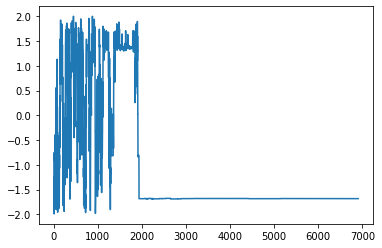

In [4]:
def wiggly(x):
    y = -np.exp(x**2/100)*np.sin(13*x-x**4)**5*np.sin(1-3*x**2)**2
    ind = np.vstack((np.argwhere(x<-2),np.argwhere(x>2)))
    y[ind]=float('inf')
    return y
    

S = wiggly

beta = 0.999
sig = 0.5
T=1
x= np.array([0])
xx=[]
Sx=S(x)
while T>10**(-3):
    T=beta*T
    y = x+sig*np.random.randn()
    Sy = S(y)
    alpha = np.amin((np.exp(-(Sy-Sx)/T),1))
    if np.random.uniform()<alpha:
        x=y
        Sx=Sy
    xx=np.hstack((xx,x))
print('minimizer = {:3.3f}, minimum = {:3.3f}'.format(x[0],Sx[0]))
plt.plot(xx)
plt.show()

## Reproduce Figure 3.10

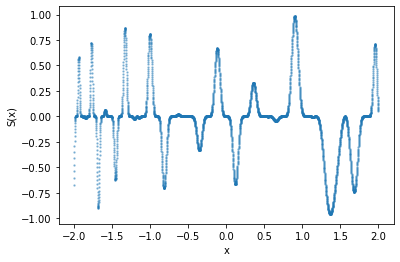

In [5]:
xx = np.arange(-2,2,0.001)
yy = wiggly(xx)
plt.scatter(xx, yy, alpha =0.4,s =2)
plt.xlabel('x')
plt.ylabel('S(x)')
plt.show()

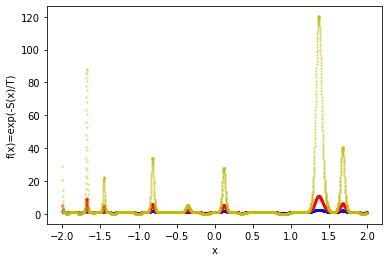

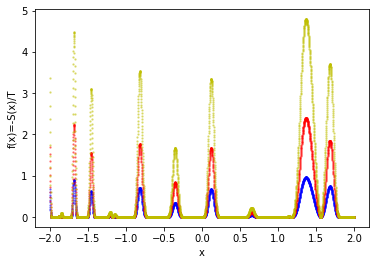

In [6]:
yy_1 = np.exp(-yy)
yy_2 = np.exp(-yy/0.4)
yy_3 = np.exp(-yy/0.2)
plt.scatter(xx, yy_1, alpha =0.4,s =2, color='b')
plt.scatter(xx, yy_2, alpha =0.4,s =2, color='r')
plt.scatter(xx, yy_3, alpha =0.4,s =2, color='y')
plt.xlabel('x')
plt.ylabel('f(x)=exp(-S(x)/T)')
plt.show()

yy_1 = np.maximum(-yy, 0)
yy_2 = np.maximum(-yy/0.4, 0)
yy_3 = np.maximum(-yy/0.2, 0)
plt.scatter(xx, yy_1, alpha =0.4,s =2, color='b')
plt.scatter(xx, yy_2, alpha =0.4,s =2, color='r')
plt.scatter(xx, yy_3, alpha =0.4,s =2, color='y')
plt.xlabel('x')
plt.ylabel('f(x)=-S(x)/T')
plt.show()

## Original code of CEmethod.py

In [7]:
np.set_printoptions(precision=3)
mu = 0
sigma = 3
N=100
Nel = 10
eps = 10**-5
S = wiggly
norm_para = []
while sigma > eps:
    X = np.random.randn(N,1)*sigma + np.array(np.ones((N,1)))*mu
    Sx = np.hstack((X, S(X)))
    sortSx = Sx[Sx[:,1].argsort(),]
    Elite = sortSx[0:Nel,:-1]
    mu = np.mean(Elite, axis=0)
    sigma = np.std(Elite, axis=0)
    print('S(mu)= {}, mu: {}, sigma: {}\n'.format(S(mu), mu, sigma))
    norm_para.append([mu.item(), sigma.item()])

S(mu)= [0.157], mu: [0.397], sigma: [0.979]

S(mu)= [-0.017], mu: [0.038], sigma: [1.039]

S(mu)= [-0.001], mu: [0.721], sigma: [0.824]

S(mu)= [0.], mu: [1.041], sigma: [0.611]

S(mu)= [-0.002], mu: [1.12], sigma: [0.499]

S(mu)= [-0.886], mu: [1.335], sigma: [0.016]

S(mu)= [-0.957], mu: [1.363], sigma: [0.006]

S(mu)= [-0.958], mu: [1.365], sigma: [0.]

S(mu)= [-0.958], mu: [1.366], sigma: [4.052e-05]

S(mu)= [-0.958], mu: [1.366], sigma: [1.219e-06]



## Reproduce Figure 3.12

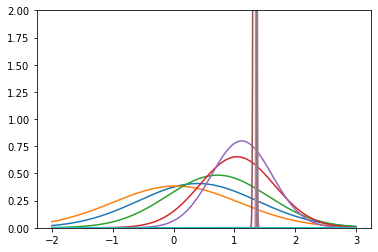

In [8]:
xx = np.arange(-2,3,0.001)
for i in range(len(norm_para)):
  rv = norm(loc = norm_para[i][0], scale = norm_para[i][1])
  plt.plot(xx, rv.pdf(xx))

plt.ylim(-2, 3)
plt.ylim(0, 2)
plt.show()